<a href="https://colab.research.google.com/github/sanxlop/stocks/blob/master/stocks_talib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install yfinance

!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf

import talib

%matplotlib inline
plt.style.use('dark_background')

In [0]:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

# # Get data from yfinance
# def get_historical_yfinance(tickers):
#     tickers = yf.Tickers(" ".join(tickers.keys()))
#     return tickers.history(period="6mo", interval="1d", start=None, end=None, actions=True, rounding=True)

# # Add extra info
# def set_change_label(x):
#     if x > 0:
#         return 1
#     else:
#         return 0

def add_price_transforms(df):
    for ticker in tickers_desc.keys():
        df[ticker,'CHANGE'] = df[ticker,'Close'].diff()
        df[ticker,'CHANGE_PERCENT'] = df[ticker,'Close'].div(df[ticker,'Close'].shift(1))*100-100
        #df[ticker,'CHANGE_LABEL'] = df[ticker,'CHANGE'].apply(set_change_label)
        df[ticker,'AVGPRICE'] = talib.AVGPRICE(df[ticker,'Open'], df[ticker,'High'], df[ticker,'Low'], df[ticker,'Close']) # Average Price
        df[ticker,'MEDPRICE'] = talib.MEDPRICE(df[ticker,'High'], df[ticker,'Low']) # Median Price
        df[ticker,'TYPPRICE'] = talib.TYPPRICE(df[ticker,'High'], df[ticker,'Low'], df[ticker,'Close']) # Typical Price
        df[ticker,'WCLPRICE'] = talib.WCLPRICE(df[ticker,'High'], df[ticker,'Low'], df[ticker,'Close']) # Weighted Close Price
    return df

def add_overlap_functions(df):
    for ticker in tickers_desc.keys():
        df[ticker,'DEMA'] = talib.DEMA(df[ticker,'Close'], timeperiod=30) # Double Exponential Moving Average
        df[ticker,'EMA'] = talib.EMA(df[ticker,'Close'], timeperiod=30) # Exponential Moving Average
        df[ticker,'HT_TRENDLINE'] = talib.HT_TRENDLINE(df[ticker,'Close']) # Hilbert Transform - Instantaneous Trendline
        df[ticker,'KAMA'] = talib.KAMA(df[ticker,'Close'], timeperiod=30) # Kaufman Adaptive Moving Average
        df[ticker,'MA'] = talib.MA(df[ticker,'Close'], timeperiod=30, matype=0) # Moving average
        df[ticker,'MAMA_mama'], df[ticker,'MAMA_fama'] = talib.MAMA(df[ticker,'Close'], fastlimit=0.5, slowlimit=0.05) # MESA Adaptive Moving Average
        #df[ticker,'MAVP'] = talib.MAVP(df[ticker,'Close'], periods, minperiod=2, maxperiod=30, matype=0) # Moving average with variable period
        df[ticker,'MIDPOINT'] = talib.MIDPOINT(df[ticker,'Close'], timeperiod=14) # MidPoint over period
        df[ticker,'MIDPRICE'] = talib.MIDPRICE(df[ticker,'High'], df[ticker,'Low'], timeperiod=14) # Midpoint Price over period
        df[ticker,'SAR'] = talib.SAR(df[ticker,'High'], df[ticker,'Low'], acceleration=0.02, maximum=0.2) # Parabolic SAR
        df[ticker,'SAREXT'] = talib.SAREXT(df[ticker,'High'], df[ticker,'Low'], startvalue=0, offsetonreverse=0, accelerationinitlong=0, accelerationlong=0, accelerationmaxlong=0, accelerationinitshort=0, accelerationshort=0, accelerationmaxshort=0) # Parabolic SAR - Extended
        df[ticker,'SMA'] = talib.SMA(df[ticker,'Close'], timeperiod=30) # Simple Moving Average
        df[ticker,'T3'] = talib.T3(df[ticker,'Close'], timeperiod=5, vfactor=0.7) # Triple Exponential Moving Average (T3)
        df[ticker,'TEMA'] = talib.TEMA(df[ticker,'Close'], timeperiod=30) # Triple Exponential Moving Average
        df[ticker,'TRIMA'] = talib.TRIMA(df[ticker,'Close'], timeperiod=30) # Triangular Moving Average
        df[ticker,'WMA'] = talib.WMA(df[ticker,'Close'], timeperiod=30) # Weighted Moving Average
    return df

def add_indicators_functions(df, timeperiod=14):
    for ticker in tickers_desc.keys():
        df[ticker,'BB_up'], df[ticker,'BB_mid'], df[ticker,'BB_low'] = talib.BBANDS(df[ticker,'Close'].values, timeperiod=timeperiod, nbdevup=2, nbdevdn=2, matype=0) # MA_Type.SMA
        df[ticker,'BBP'] = (df[ticker,'Close'] - df[ticker,'BB_low']) / (df[ticker,'BB_up'] - df[ticker,'BB_low'])
        df[ticker,'RSI'] = talib.RSI(df[ticker,'Close'], timeperiod=timeperiod)
    return df


In [0]:
tickers_desc = {'ATVI': 'Activision',
              'ADS': 'Adidas',
              'GOOG': 'Alphabet',
              'MSFT': 'Microsoft',
              'AMZN': 'Amazon.com',
              'TEF': 'Telefonica',
              'CHFS': 'CHF_Solutions',
              'ASTC': 'Astrotech',
              'UBER': 'Uber'
              }
tickers_names = " ".join(tickers_desc.keys())

predict_column = 'Close'

In [0]:
"""Get data from yfinance"""
print(tickers_names)
hist = yf.download(tickers_names, period="3mo", interval="1d", start=None, end=None, actions=False, rounding=True, group_by='ticker', threads=True)
#display(hist.tail(1))
"""Add extra info"""
hist = add_price_transforms(df=hist)
hist = add_overlap_functions(df=hist)
hist = add_indicators_functions(df=hist, timeperiod=14)
display(hist[['GOOG']].head(1))
display(hist[['GOOG']].tail(1))
#print(len(hist))

ATVI ADS GOOG MSFT AMZN TEF CHFS ASTC UBER
[*********************100%***********************]  9 of 9 completed


GOOG                             ...                      
               Open     High      Low    Close  ... BB_mid BB_low BBP RSI
Date                                            ...                      
2020-01-02  1341.55  1368.14  1341.55  1367.37  ...    NaN    NaN NaN NaN

[1 rows x 33 columns]

GOOG                   ...                                  
              Open    High      Low  ...       BB_low       BBP        RSI
Date                                 ...                                  
2020-03-31  1147.3  1175.3  1138.14  ...  1040.339693  0.755933  45.721994

[1 rows x 33 columns]

In [0]:
stock_symbol = 'ASTC'

price = pd.DataFrame({'Close': hist[stock_symbol, 'Close']})
# price = price.iloc[::-1] # Invert order
# price = price.dropna()
close = price['Close'].values

up, mid, low = talib.BBANDS(close, timeperiod=14, nbdevup=2, nbdevdn=2, matype=0) # MA_Type.SMA
bbp = (price['Close'] - low) / (up - low)
rsi = talib.RSI(close, timeperiod=14)

price['RSI'] = rsi
price['BBP'] = bbp
price['BB_up'] = up
price['BB_mid'] = mid
price['BB_low'] = low

RSI_LOW_LIMIT = 30
RSI_UP_LIMIT = 70
BBP_LOW_LIMIT = 0
BBP_UP_LIMIT = 1


###PONERLO TODO EN UNA TABLAAAA



holdings = pd.DataFrame(index=price.index, data={'Holdings': np.array([np.nan] * price.index.shape[0])})
holdings.loc[((price['RSI'] < RSI_LOW_LIMIT) & (price['BBP'] < BBP_LOW_LIMIT)), 'Holdings'] = price['RSI']/100 # + price['BBP'])/2 # + Buy Green
holdings.loc[((price['RSI'] > RSI_UP_LIMIT) & (price['BBP'] > BBP_UP_LIMIT)), 'Holdings'] = -(price['RSI']/100) # + price['BBP'])/2 # - Sell Red
holdings = holdings.fillna(0)
display(holdings[holdings['Holdings']!=0])

,Holdings
Date,
2020-03-25,-0.814545
2020-03-26,-0.706250


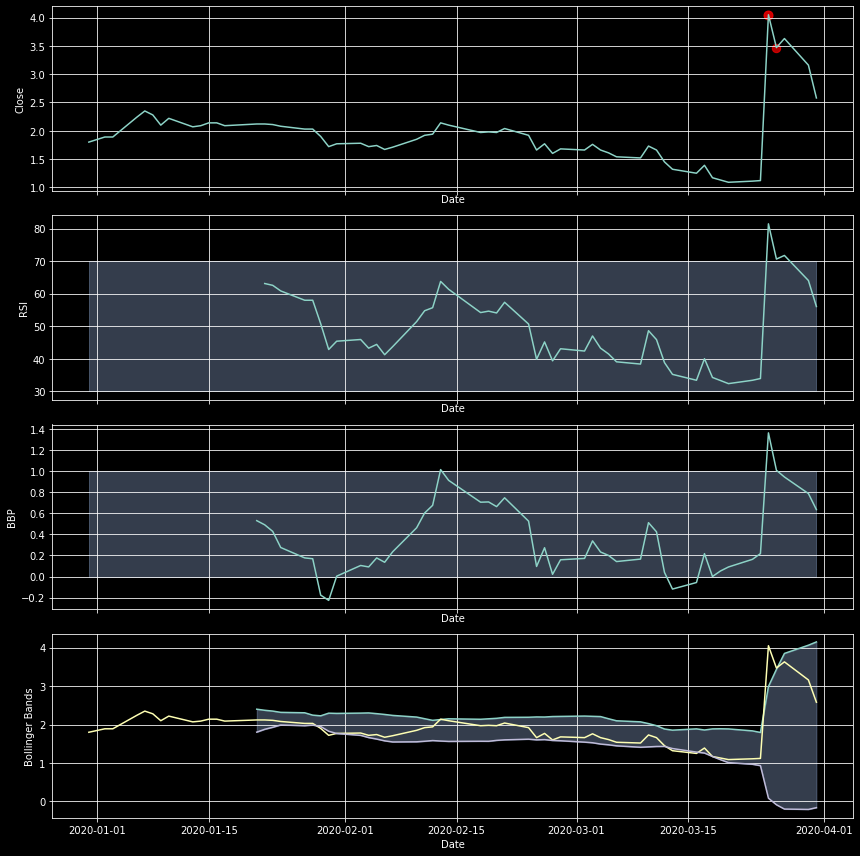

In [0]:
fig, (ax0, ax1, ax3, ax2) = plt.subplots(4, 1, sharex=True, figsize=(12, 12))
ax0.plot(price.index, price['Close'], label='Close')
ax0.set_xlabel('Date')
ax0.set_ylabel('Close')
ax0.grid()
for day, holding in holdings.iterrows():
    order = holding['Holdings']
    if order > 0: # + Buy Green
        ax0.scatter(x=day, y=price.loc[day, 'Close'], color='green', alpha=(1-order), s=(1-order)*100)
    elif order < 0: # - Sell Red
        ax0.scatter(x=day, y=price.loc[day, 'Close'], color='red', alpha=abs(order), s=abs(order)*100)

ax1.plot(price.index, price['RSI'], label='RSI')
ax1.fill_between(price.index, y1=RSI_LOW_LIMIT, y2=RSI_UP_LIMIT, color='#adccff', alpha=0.3)
ax1.set_xlabel('Date')
ax1.set_ylabel('RSI')
ax1.grid()

ax3.plot(price.index, price['BBP'], label='BBP')
ax3.fill_between(price.index, y1=BBP_LOW_LIMIT, y2=BBP_UP_LIMIT, color='#adccff', alpha=0.3)
ax3.set_xlabel('Date')
ax3.set_ylabel('BBP')
ax3.grid()

ax2.plot(price.index, price['BB_up'], label='BB_up')
ax2.plot(price.index, price['Close'], label='Close')
ax2.plot(price.index, price['BB_low'], label='BB_low')
ax2.fill_between(price.index, y1=price['BB_low'], y2=price['BB_up'], color='#adccff', alpha=0.3)
ax2.set_xlabel('Date')
ax2.set_ylabel('Bollinger Bands')
ax2.grid()

fig.tight_layout()
plt.show()

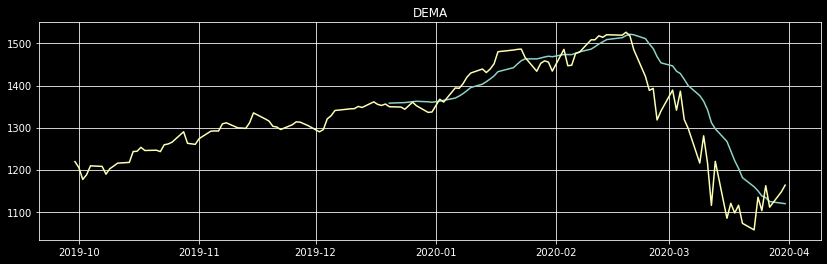

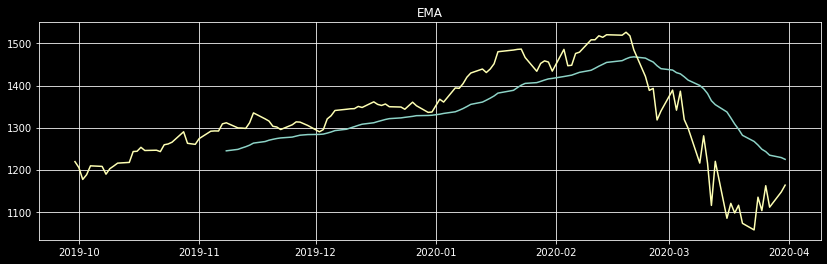

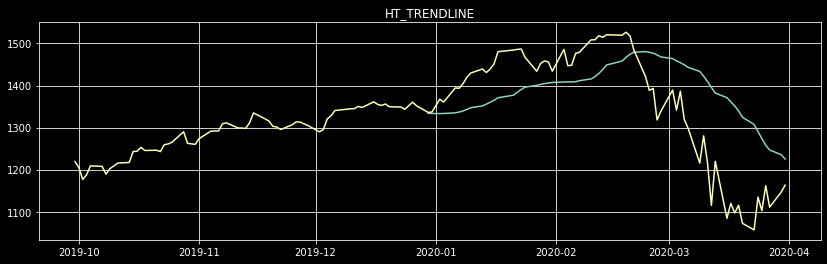

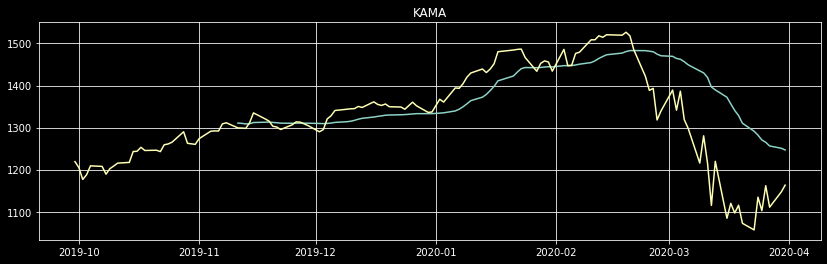

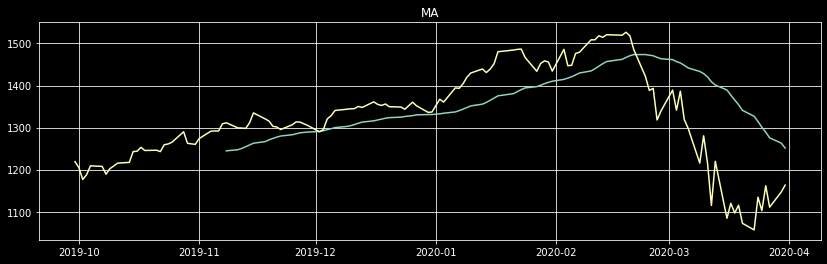

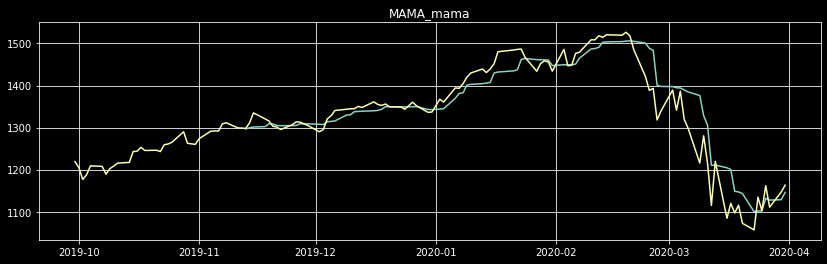

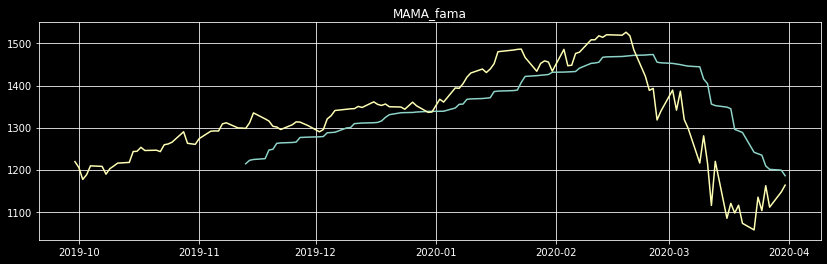

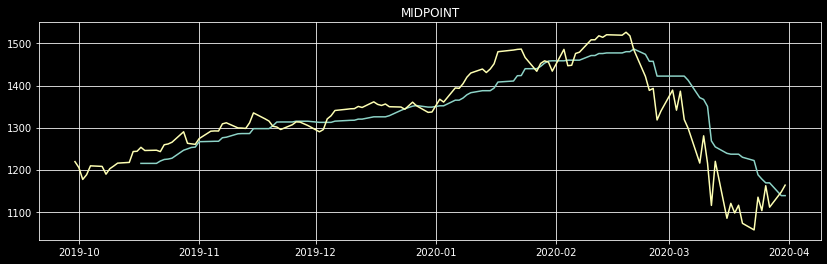

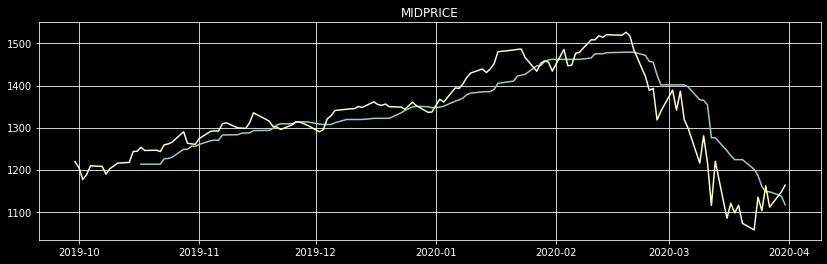

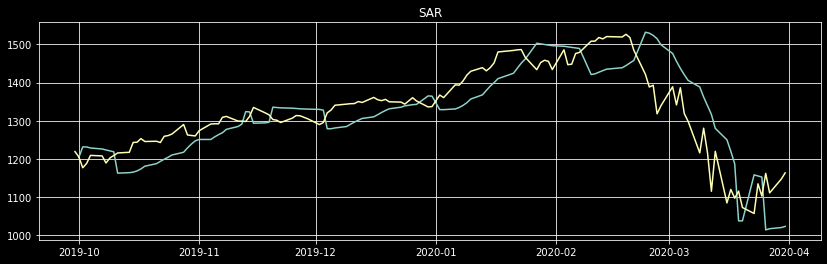

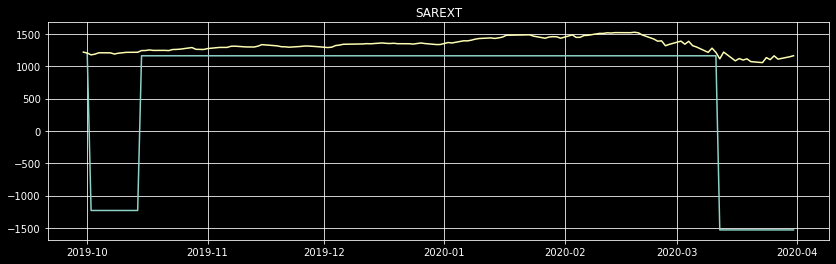

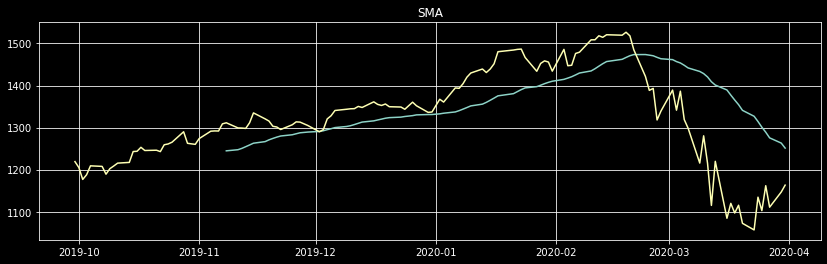

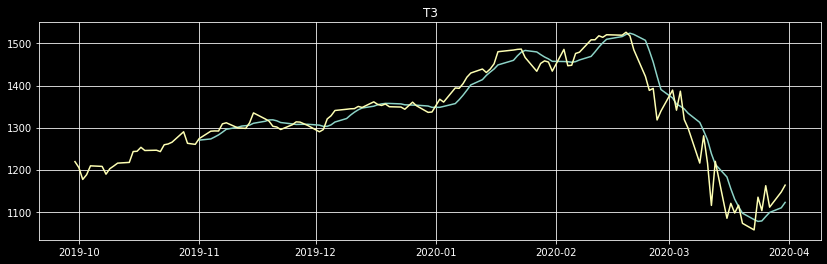

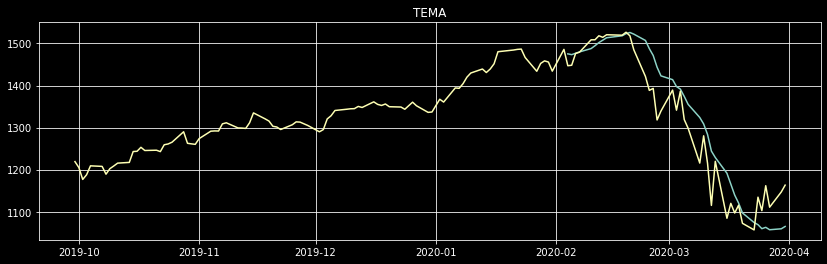

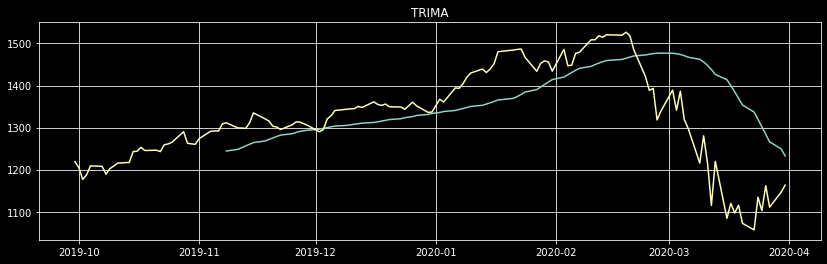

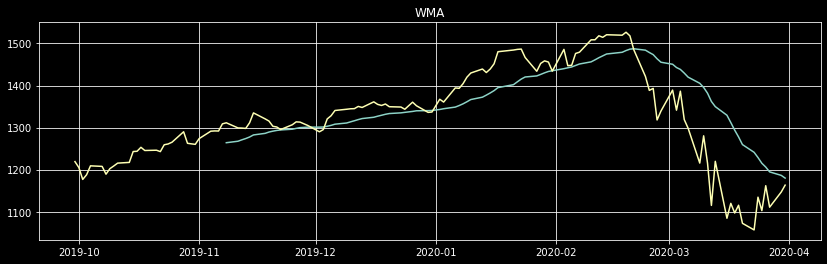

In [0]:
overlap_functions = ['DEMA', 'EMA', 'HT_TRENDLINE', 'KAMA', 'MA', 'MAMA_mama', 'MAMA_fama', 'MIDPOINT', 'MIDPRICE', 'SAR', 'SAREXT', 'SMA', 'T3', 'TEMA', 'TRIMA', 'WMA']
for func in overlap_functions:
    plt.figure(figsize=(14,4))
    plt.title(func)
    plt.grid()
    plt.plot(hist['GOOG', func])
    plt.plot(hist['GOOG', 'Close'])
    # Show/save figure as desired.
    plt.show()

In [0]:
from talib import CDL2CROWS, CDL3BLACKCROWS, CDL3INSIDE, CDL3LINESTRIKE, CDL3OUTSIDE, CDL3STARSINSOUTH, CDL3WHITESOLDIERS, CDLABANDONEDBABY, CDLADVANCEBLOCK, CDLBELTHOLD, CDLBREAKAWAY, CDLCLOSINGMARUBOZU, CDLCONCEALBABYSWALL, CDLCOUNTERATTACK, CDLDARKCLOUDCOVER, CDLDOJI, CDLDOJISTAR, CDLDRAGONFLYDOJI, CDLENGULFING, CDLEVENINGDOJISTAR, CDLEVENINGSTAR, CDLGAPSIDESIDEWHITE, CDLGRAVESTONEDOJI, CDLHAMMER, CDLHANGINGMAN, CDLHARAMI, CDLHARAMICROSS, CDLHIGHWAVE, CDLHIKKAKE, CDLHIKKAKEMOD, CDLHOMINGPIGEON, CDLIDENTICAL3CROWS, CDLINNECK, CDLINVERTEDHAMMER, CDLKICKING, CDLKICKINGBYLENGTH, CDLLADDERBOTTOM, CDLLONGLEGGEDDOJI, CDLLONGLINE, CDLMARUBOZU, CDLMATCHINGLOW, CDLMATHOLD, CDLMORNINGDOJISTAR, CDLMORNINGSTAR, CDLONNECK, CDLPIERCING, CDLRICKSHAWMAN, CDLRISEFALL3METHODS, CDLSEPARATINGLINES, CDLSHOOTINGSTAR, CDLSHORTLINE, CDLSPINNINGTOP, CDLSTALLEDPATTERN, CDLSTICKSANDWICH, CDLTAKURI, CDLTASUKIGAP, CDLTHRUSTING, CDLTRISTAR, CDLUNIQUE3RIVER, CDLUPSIDEGAP2CROWS, CDLXSIDEGAP3METHODS

patterns = [CDL2CROWS, CDL3BLACKCROWS, CDL3INSIDE, CDL3LINESTRIKE, CDL3OUTSIDE, CDL3STARSINSOUTH, CDL3WHITESOLDIERS, CDLABANDONEDBABY, CDLADVANCEBLOCK, CDLBELTHOLD, CDLBREAKAWAY, CDLCLOSINGMARUBOZU, CDLCONCEALBABYSWALL, CDLCOUNTERATTACK, CDLDARKCLOUDCOVER, CDLDOJI, CDLDOJISTAR, CDLDRAGONFLYDOJI, CDLENGULFING, CDLEVENINGDOJISTAR, CDLEVENINGSTAR, CDLGAPSIDESIDEWHITE, CDLGRAVESTONEDOJI, CDLHAMMER, CDLHANGINGMAN, CDLHARAMI, CDLHARAMICROSS, CDLHIGHWAVE, CDLHIKKAKE, CDLHIKKAKEMOD, CDLHOMINGPIGEON, CDLIDENTICAL3CROWS, CDLINNECK, CDLINVERTEDHAMMER, CDLKICKING, CDLKICKINGBYLENGTH, CDLLADDERBOTTOM, CDLLONGLEGGEDDOJI, CDLLONGLINE, CDLMARUBOZU, CDLMATCHINGLOW, CDLMATHOLD, CDLMORNINGDOJISTAR, CDLMORNINGSTAR, CDLONNECK, CDLPIERCING, CDLRICKSHAWMAN, CDLRISEFALL3METHODS, CDLSEPARATINGLINES, CDLSHOOTINGSTAR, CDLSHORTLINE, CDLSPINNINGTOP, CDLSTALLEDPATTERN, CDLSTICKSANDWICH, CDLTAKURI, CDLTASUKIGAP, CDLTHRUSTING, CDLTRISTAR, CDLUNIQUE3RIVER, CDLUPSIDEGAP2CROWS, CDLXSIDEGAP3METHODS]
patterns_names = ['CDL2CROWS - Two Crows', 'CDL3BLACKCROWS - Three Black Crows', 'CDL3INSIDE - Three Inside Up/Down', 'CDL3LINESTRIKE - Three-Line Strike', 'CDL3OUTSIDE - Three Outside Up/Down', 'CDL3STARSINSOUTH - Three Stars In The South', 'CDL3WHITESOLDIERS - Three Advancing White Soldiers', 'CDLABANDONEDBABY - Abandoned Baby', 'CDLADVANCEBLOCK - Advance Block', 'CDLBELTHOLD - Belt-hold', 'CDLBREAKAWAY - Breakaway', 'CDLCLOSINGMARUBOZU - Closing Marubozu', 'CDLCONCEALBABYSWALL - Concealing Baby Swallow', 'CDLCOUNTERATTACK - Counterattack', 'CDLDARKCLOUDCOVER - Dark Cloud Cover', 'CDLDOJI - Doji', 'CDLDOJISTAR - Doji Star', 'CDLDRAGONFLYDOJI - Dragonfly Doji', 'CDLENGULFING - Engulfing Pattern', 'CDLEVENINGDOJISTAR - Evening Doji Star', 'CDLEVENINGSTAR - Evening Star', 'CDLGAPSIDESIDEWHITE - Up/Down-gap side-by-side white lines', 'CDLGRAVESTONEDOJI - Gravestone Doji', 'CDLHAMMER - Hammer', 'CDLHANGINGMAN - Hanging Man', 'CDLHARAMI - Harami Pattern', 'CDLHARAMICROSS - Harami Cross Pattern', 'CDLHIGHWAVE - High-Wave Candle', 'CDLHIKKAKE - Hikkake Pattern', 'CDLHIKKAKEMOD - Modified Hikkake Pattern', 'CDLHOMINGPIGEON - Homing Pigeon', 'CDLIDENTICAL3CROWS - Identical Three Crows', 'CDLINNECK - In-Neck Pattern', 'CDLINVERTEDHAMMER - Inverted Hammer', 'CDLKICKING - Kicking', 'CDLKICKINGBYLENGTH - Kicking - bull/bear determined by the longer marubozu', 'CDLLADDERBOTTOM - Ladder Bottom', 'CDLLONGLEGGEDDOJI - Long Legged Doji', 'CDLLONGLINE - Long Line Candle', 'CDLMARUBOZU - Marubozu', 'CDLMATCHINGLOW - Matching Low', 'CDLMATHOLD - Mat Hold', 'CDLMORNINGDOJISTAR - Morning Doji Star', 'CDLMORNINGSTAR - Morning Star', 'CDLONNECK - On-Neck Pattern', 'CDLPIERCING - Piercing Pattern', 'CDLRICKSHAWMAN - Rickshaw Man', 'CDLRISEFALL3METHODS - Rising/Falling Three Methods', 'CDLSEPARATINGLINES - Separating Lines', 'CDLSHOOTINGSTAR - Shooting Star', 'CDLSHORTLINE - Short Line Candle', 'CDLSPINNINGTOP - Spinning Top', 'CDLSTALLEDPATTERN - Stalled Pattern', 'CDLSTICKSANDWICH - Stick Sandwich', 'CDLTAKURI - Takuri (Dragonfly Doji with very long lower shadow)', 'CDLTASUKIGAP - Tasuki Gap', 'CDLTHRUSTING - Thrusting Pattern', 'CDLTRISTAR - Tristar Pattern', 'CDLUNIQUE3RIVER - Unique 3 River', 'CDLUPSIDEGAP2CROWS - Upside Gap Two Crows', 'CDLXSIDEGAP3METHODS - Upside/Downside Gap Three Method']

for patt, patt_name in zip(patterns, patterns_names):
    integer = patt(hist['Open', stock_symbol], 
                    hist['High', stock_symbol], 
                    hist['Low', stock_symbol], 
                    hist['Close', stock_symbol])
    if len(integer.tail(2).unique()) > 1:
        print(patt_name)
        print(integer.tail(2))

CDLSHORTLINE - Short Line Candle
Date
2020-03-30      0
2020-03-31   -100
dtype: int32
CDLSPINNINGTOP - Spinning Top
Date
2020-03-30      0
2020-03-31   -100
dtype: int32


In [0]:
import talib

print(talib.get_functions())

for key,value in talib.get_function_groups().items():
  print(key,value)

['HT_DCPERIOD', 'HT_DCPHASE', 'HT_PHASOR', 'HT_SINE', 'HT_TRENDMODE', 'ADD', 'DIV', 'MAX', 'MAXINDEX', 'MIN', 'MININDEX', 'MINMAX', 'MINMAXINDEX', 'MULT', 'SUB', 'SUM', 'ACOS', 'ASIN', 'ATAN', 'CEIL', 'COS', 'COSH', 'EXP', 'FLOOR', 'LN', 'LOG10', 'SIN', 'SINH', 'SQRT', 'TAN', 'TANH', 'ADX', 'ADXR', 'APO', 'AROON', 'AROONOSC', 'BOP', 'CCI', 'CMO', 'DX', 'MACD', 'MACDEXT', 'MACDFIX', 'MFI', 'MINUS_DI', 'MINUS_DM', 'MOM', 'PLUS_DI', 'PLUS_DM', 'PPO', 'ROC', 'ROCP', 'ROCR', 'ROCR100', 'RSI', 'STOCH', 'STOCHF', 'STOCHRSI', 'TRIX', 'ULTOSC', 'WILLR', 'BBANDS', 'DEMA', 'EMA', 'HT_TRENDLINE', 'KAMA', 'MA', 'MAMA', 'MAVP', 'MIDPOINT', 'MIDPRICE', 'SAR', 'SAREXT', 'SMA', 'T3', 'TEMA', 'TRIMA', 'WMA', 'CDL2CROWS', 'CDL3BLACKCROWS', 'CDL3INSIDE', 'CDL3LINESTRIKE', 'CDL3OUTSIDE', 'CDL3STARSINSOUTH', 'CDL3WHITESOLDIERS', 'CDLABANDONEDBABY', 'CDLADVANCEBLOCK', 'CDLBELTHOLD', 'CDLBREAKAWAY', 'CDLCLOSINGMARUBOZU', 'CDLCONCEALBABYSWALL', 'CDLCOUNTERATTACK', 'CDLDARKCLOUDCOVER', 'CDLDOJI', 'CDLDOJISTAR',